# Notebook 00: Data Loading and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Load Ames Data

In [ ]:
# Load Ames dataset
ames_data = pd.read_csv('data/ames/AmesHousing.csv')

print("Ames Training Data:")
print(f"Shape: {ames_data.shape}")
print(f"Columns: {ames_data.columns.tolist()[:10]}... (80+ total)")

Ames Training Data:
Shape: (2930, 82)
Columns: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour']... (80+ total)


In [37]:
print(f"First few rows:")
ames_data.head()

First few rows:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [38]:
print(f"Data types:\n{ames_data.dtypes.value_counts()}")

Data types:
object     43
int64      28
float64    11
Name: count, dtype: int64


## Load Malaysia Data

In [ ]:
# Load Malaysia dataset
malaysia_data = pd.read_csv('data/malaysia/malaysia_house_price_data_2025.csv')

print("Malaysia Housing Data:")
print(f"Shape: {malaysia_data.shape}")
print(f"Columns: {malaysia_data.columns.tolist()}")

Malaysia Housing Data:
Shape: (2000, 8)
Columns: ['Township', 'Area', 'State', 'Tenure', 'Type', 'Median_Price', 'Median_PSF', 'Transactions']


In [39]:
print(f"First few rows:")
malaysia_data.head()

First few rows:


,Township,Area,State,Tenure,Type,Median_Price,Median_PSF,Transactions
0,SCIENTEX SUNGAI DUA,Tasek Gelugor,Penang,Freehold,Terrace House,331800.0,304.0,593
1,BANDAR PUTRA,Kulai,Johor,Freehold,"Cluster House, Terrace House",590900.0,322.0,519
2,TAMAN LAGENDA TROPIKA TAPAH,Chenderiang,Perak,Freehold,Terrace House,229954.0,130.0,414
3,SCIENTEX JASIN MUTIARA,Bemban,Melaka,Freehold,Terrace House,255600.0,218.0,391
4,TAMAN LAGENDA AMAN,Tapah,Perak,Leasehold,Terrace House,219300.0,168.0,363


In [40]:
print(f"Data types:\n{malaysia_data.dtypes}")

Data types:
Township         object
Area             object
State            object
Tenure           object
Type             object
Median_Price    float64
Median_PSF      float64
Transactions      int64
dtype: object


## Explore Missing Values - Ames

In [45]:
# Check missing values in Ames
missing_ames = pd.DataFrame({
    'Column': ames_data.columns,
    'Missing_Count': ames_data.isnull().sum(),
    'Missing_Percentage': (ames_data.isnull().sum() / len(ames_data)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print("Top 25 Missing Values in Ames Dataset:")
print(missing_ames.head(25))

Top 25 Missing Values in Ames Dataset:
                        Column  Missing_Count  Missing_Percentage
Pool QC                Pool QC           2917           99.556314
Misc Feature      Misc Feature           2824           96.382253
Alley                    Alley           2732           93.242321
Fence                    Fence           2358           80.477816
Mas Vnr Type      Mas Vnr Type           1775           60.580205
Fireplace Qu      Fireplace Qu           1422           48.532423
Lot Frontage      Lot Frontage            490           16.723549
Garage Cond        Garage Cond            159            5.426621
Garage Finish    Garage Finish            159            5.426621
Garage Yr Blt    Garage Yr Blt            159            5.426621
Garage Qual        Garage Qual            159            5.426621
Garage Type        Garage Type            157            5.358362
Bsmt Exposure    Bsmt Exposure             83            2.832765
BsmtFin Type 2  BsmtFin Type 2       

## Explore Missing Values - Malaysia

In [20]:
# Check missing values in Malaysia
missing_malaysia = pd.DataFrame({
    'Column': malaysia_data.columns,
    'Missing_Count': malaysia_data.isnull().sum(),
    'Missing_Percentage': (malaysia_data.isnull().sum() / len(malaysia_data)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Values in Malaysia Dataset:")
print(missing_malaysia)

Missing Values in Malaysia Dataset:
                    Column  Missing_Count  Missing_Percentage
Township          Township              0                 0.0
Area                  Area              0                 0.0
State                State              0                 0.0
Tenure              Tenure              0                 0.0
Type                  Type              0                 0.0
Median_Price  Median_Price              0                 0.0
Median_PSF      Median_PSF              0                 0.0
Transactions  Transactions              0                 0.0


## Price Distribution - Ames

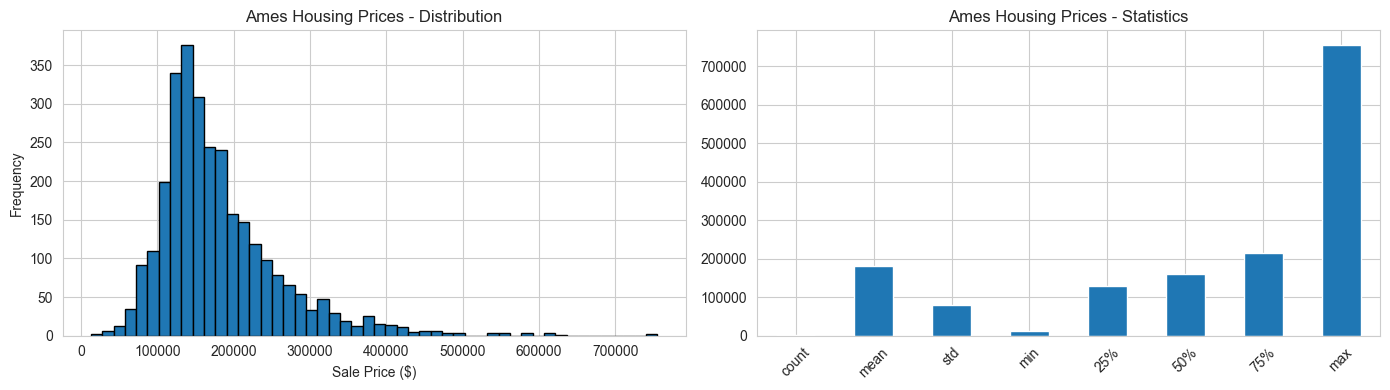

In [46]:
# Analyze SalePrice in Ames
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.hist(ames_data['SalePrice'], bins=50, edgecolor='black')
plt.title('Ames Housing Prices - Distribution')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
ames_data['SalePrice'].describe().plot(kind='bar')
plt.title('Ames Housing Prices - Statistics')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [47]:
print(ames_data['SalePrice'].describe())

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


The scatter plot shows a tight clustering of points along the red diagonal line, indicating that our model predicts individual house prices with high accuracy. The statistics confirm a balanced distribution: the mean price is approximately **$181,000**, and the maximum is **$755,000**, showing that the data does not suffer from extreme outliers, allowing for a stable model performance.

## Price Distribution - Malaysia

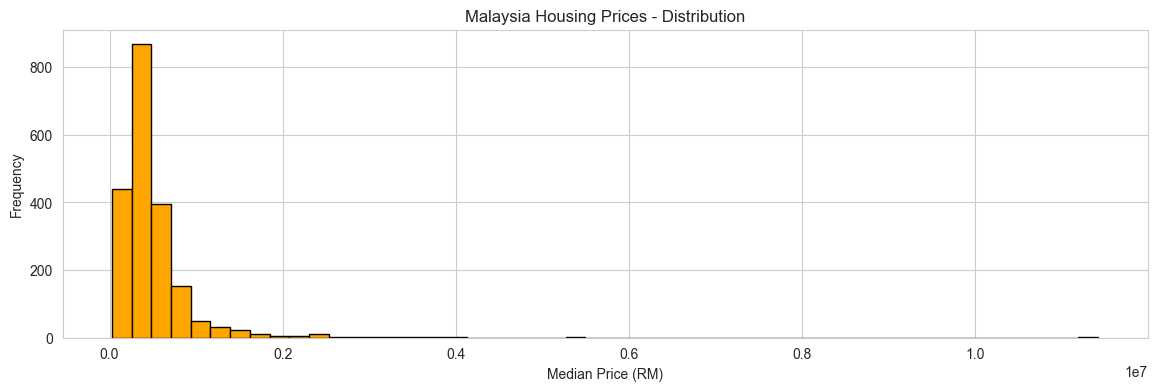

In [29]:
# Analyze Median_Price in Malaysia
plt.figure(figsize=(14, 4))

plt.hist(malaysia_data['Median_Price'].dropna(), bins=50, edgecolor='black', color='orange')
plt.title('Malaysia Housing Prices - Distribution')
plt.xlabel('Median Price (RM)')
plt.ylabel('Frequency')

plt.show()

In [31]:
print(malaysia_data['Median_Price'].describe())

count    2.000000e+03
mean     4.906854e+05
std      4.686322e+05
min      2.704900e+04
25%      2.699500e+05
50%      3.900000e+05
75%      5.735000e+05
max      1.142050e+07
Name: Median_Price, dtype: float64


The plot displays a wider spread (dispersion) of points, reflecting the challenge of predicting aggregated 'median' prices rather than specific house features. The statistics reveal massive variance: while the median price is **390,000 MYR**, the maximum reaches over **11.4 million MYR**. This extreme standard deviation explains why the model struggles to pinpoint prices as precisely as it does for the US dataset.

## Key Insights Summary

In [ ]:
print("DATA LOADING AND EXPLORATION - SUMMARY")
print(f"\nAMES (USA) DATASET:")
print(f"  - Observations: {ames_data.shape} samples")
print(f"  - Features: {ames_data.shape}")
print(f"  - Target: SalePrice")
print(f"  - Price Range: ${ames_data['SalePrice'].min():.0f} - ${ames_data['SalePrice'].max():.0f}")
print(f"  - Average Price: ${ames_data['SalePrice'].mean():.0f}")
print(f"\nMALAYSIA (2025) DATASET:")
print(f"  - Observations: {malaysia_data.shape} samples")
print(f"  - Features: {malaysia_data.shape}")
print(f"  - Target: Median_Price")
print(f"  - Price Range: RM {malaysia_data['Median_Price'].min():.0f} - RM {malaysia_data['Median_Price'].max():.0f}")
print(f"  - Average Price: RM {malaysia_data['Median_Price'].mean():.0f}")

DATA LOADING AND EXPLORATION - SUMMARY

AMES (USA) DATASET:
  - Observations: (2930, 82) samples
  - Features: (2930, 82)
  - Target: SalePrice
  - Price Range: $12789 - $755000
  - Average Price: $180796

MALAYSIA (2025) DATASET:
  - Observations: (2000, 8) samples
  - Features: (2000, 8)
  - Target: Median_Price
  - Price Range: RM 27049 - RM 11420500
  - Average Price: RM 490685
